In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from io import StringIO

In [ ]:
df = pd.read_csv("train_post_EDA.csv")

In [ ]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_val_score
import numpy as np 

dummy = DummyRegressor(strategy="mean")  # or "median"
kfold = KFold(n_splits=5, shuffle=True, random_state=25)

mse_scores = cross_val_score(dummy, X, y, cv=kfold, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-mse_scores)

r2_scores = cross_val_score(dummy, X, y, cv=kfold, scoring="r2")

print("DUMMY (mean) RMSE per fold:", rmse_scores)
print("DUMMY Mean RMSE:", rmse_scores.mean())
print("DUMMY R² per fold:", r2_scores)
print("DUMMY Mean R²:", r2_scores.mean())


DUMMY (mean) RMSE per fold: [14.58170281  9.91322978  8.94374268 13.35037916  6.0671724 ]
DUMMY Mean RMSE: 10.571245368576502
DUMMY R² per fold: [-0.03422703 -0.01265636 -0.21269778 -0.01253439 -0.85803535]
DUMMY Mean R²: -0.2260301828609624


In [ ]:
#Energy Burden 
feature_col = next((c for c in df.columns if 'energy burden' in c.lower()), None)
target_col = next((c for c in df.columns if 'emergency' in c.lower()), None)

print("Using Feature:", feature_col)
print("Using Target:", target_col)

X = df[[feature_col]].astype(float)


Using Feature: Energy Burden % of Income
Using Target: Emergency Visits / 100000 temp residual


In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=25)


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse_scores, r2_scores = [], []
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))

print("RMSE per fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

RMSE per fold: [np.float64(11.067044354135383), np.float64(7.960479649809384), np.float64(8.837016209911337), np.float64(12.824314445968477), np.float64(5.573147135174392)]
Mean RMSE: 9.252400358999797
R² per fold: [0.40425185529093766, 0.3470044494520852, -0.183928004345155, 0.06569020936209491, -0.5677698931351338]
Mean R²: 0.01304972332496579


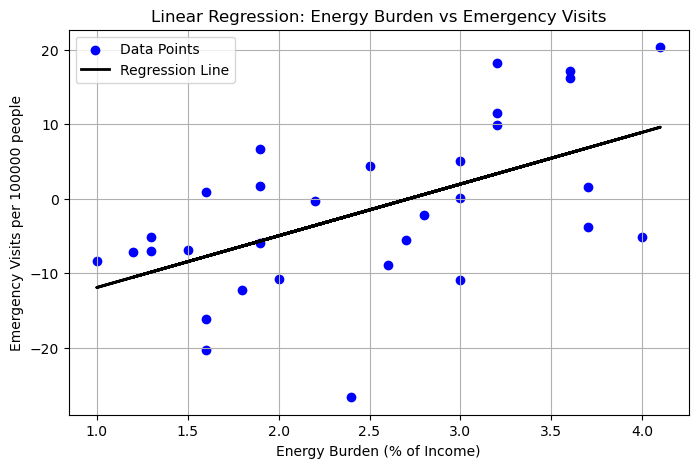

Regression Equation: y = 6.947x + -18.881


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv("train_post_EDA.csv")


X = df[['Energy Burden % of Income']]  
y = df['Emergency Visits / 100000 temp residual']


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='black', linewidth=2, label='Regression Line')


plt.xlabel("Energy Burden (% of Income)")
plt.ylabel("Emergency Visits per 100000 people")
plt.title("Linear Regression: Energy Burden vs Emergency Visits")
plt.legend()
plt.grid(True)
plt.show()

print("Regression Equation: y = {:.3f}x + {:.3f}".format(model.coef_[0], model.intercept_))


Using Feature: Park within 1/2 Mile
Using Target: Emergency Visits / 100000 temp residual
RMSE per fold: [np.float64(13.208369123378596), np.float64(8.836709852571568), np.float64(8.646045359459238), np.float64(14.42736523417244), np.float64(4.734440406215617)]
Mean RMSE: 9.970585995159492
R² per fold: [0.15141022960428563, 0.19533902328309283, -0.1333107528612758, -0.1824877110130474, -0.1314063477630656]
Mean R²: -0.020091111750002066


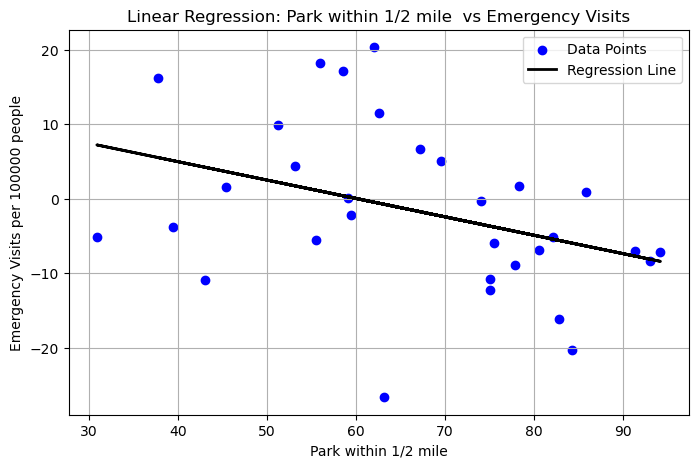

Regression Equation: y = -0.247x + 14.848


In [ ]:
df = pd.read_csv("train_post_EDA.csv")
#Park within 1/2 miles
feature_col = next((c for c in df.columns if 'park' in c.lower()), None)
target_col = next((c for c in df.columns if 'emergency' in c.lower()), None)

print("Using Feature:", feature_col)
print("Using Target:", target_col)

X = df[[feature_col]].astype(float)

kfold = KFold(n_splits=5, shuffle=True, random_state=25)

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse_scores, r2_scores = [], []
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))

print("RMSE per fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv("train_post_EDA.csv")


X = df[['Park within 1/2 Mile']]  
y = df['Emergency Visits / 100000 temp residual']


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='black', linewidth=2, label='Regression Line')


plt.xlabel("Park within 1/2 mile")
plt.ylabel("Emergency Visits per 100000 people")
plt.title("Linear Regression: Park within 1/2 mile  vs Emergency Visits")
plt.legend()
plt.grid(True)
plt.show()

print("Regression Equation: y = {:.3f}x + {:.3f}".format(model.coef_[0], model.intercept_))



Using Feature: Imperviousness
Using Target: Emergency Visits / 100000 temp residual
RMSE per fold: [np.float64(13.276714065332383), np.float64(9.129120028687948), np.float64(11.937279745421261), np.float64(13.436666889754049), np.float64(6.641594385356317)]
Mean RMSE: 10.884275022910392
R² per fold: [0.14260568054102163, 0.14120484928585664, -1.1603530636679324, -0.025665351853267016, -1.2265169216759841]
Mean R²: -0.42574496147406105


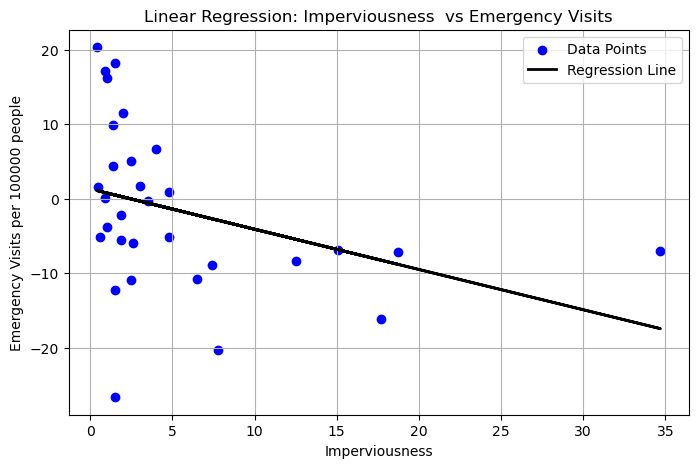

Regression Equation: y = -0.541x + 1.300


In [ ]:
df = pd.read_csv("train_post_EDA.csv")
#imperviousness
feature_col = next((c for c in df.columns if 'imperviousness' in c.lower()), None)
target_col = next((c for c in df.columns if 'emergency' in c.lower()), None)

print("Using Feature:", feature_col)
print("Using Target:", target_col)

X = df[[feature_col]].astype(float)

kfold = KFold(n_splits=5, shuffle=True, random_state=25)

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse_scores, r2_scores = [], []
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))

print("RMSE per fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv("train_post_EDA.csv")


X = df[['Imperviousness']]  
y = df['Emergency Visits / 100000 temp residual']


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='black', linewidth=2, label='Regression Line')


plt.xlabel("Imperviousness")
plt.ylabel("Emergency Visits per 100000 people")
plt.title("Linear Regression: Imperviousness  vs Emergency Visits")
plt.legend()
plt.grid(True)
plt.show()

print("Regression Equation: y = {:.3f}x + {:.3f}".format(model.coef_[0], model.intercept_))



Using Feature: % w/o Internet
Using Target: Emergency Visits / 100000 temp residual
RMSE per fold: [np.float64(12.725771433043843), np.float64(8.178318663622857), np.float64(8.45577389435782), np.float64(13.318746251237688), np.float64(4.593059632703219)]
Mean RMSE: 9.454333974993085
R² per fold: [0.21228768580483603, 0.3107769293916729, -0.0839786118131669, -0.007741800391413145, -0.06484273041820421]
Mean R²: 0.07330029451474493


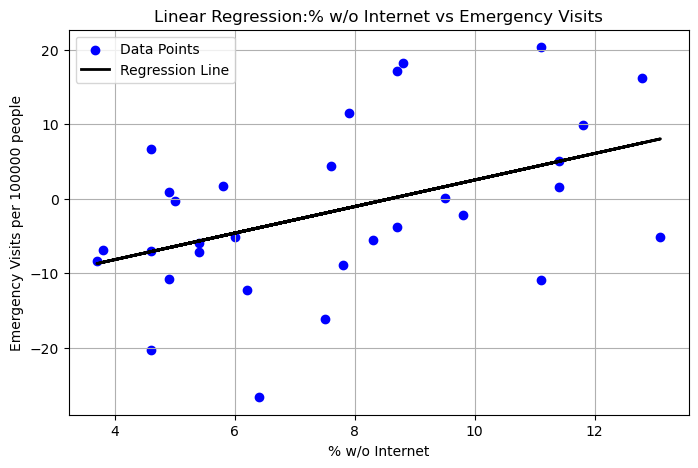

Regression Equation: y = 1.782x + -15.316


In [ ]:
df = pd.read_csv("train_post_EDA.csv")
#Internet
feature_col = next((c for c in df.columns if 'internet' in c.lower()), None)
target_col = next((c for c in df.columns if 'emergency' in c.lower()), None)

print("Using Feature:", feature_col)
print("Using Target:", target_col)

X = df[[feature_col]].astype(float)

kfold = KFold(n_splits=5, shuffle=True, random_state=25)

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse_scores, r2_scores = [], []
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    r2_scores.append(r2_score(y_test, y_pred))

print("RMSE per fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("R² per fold:", r2_scores)
print("Mean R²:", np.mean(r2_scores))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv("train_post_EDA.csv")


X = df[['% w/o Internet']]  
y = df['Emergency Visits / 100000 temp residual']


model = LinearRegression()
model.fit(X, y)


y_pred = model.predict(X)


plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='black', linewidth=2, label='Regression Line')


plt.xlabel("% w/o Internet")
plt.ylabel("Emergency Visits per 100000 people")
plt.title("Linear Regression:% w/o Internet vs Emergency Visits")
plt.legend()
plt.grid(True)
plt.show()

print("Regression Equation: y = {:.3f}x + {:.3f}".format(model.coef_[0], model.intercept_))

